## Evaluación del Impacto de un Rediseño en E-commerce

### Contexto

Una tienda en línea con clientes recurrentes ha implementado un nuevo diseño en su página de producto. El objetivo es analizar si el nuevo diseño **incrementa significativamente** el tiempo promedio que los usuarios pasan en la página.

### Detalles del Estudio

- Se seleccionaron aleatoriamente **100 clientes recurrentes**.
- A cada cliente se midió el tiempo (en segundos) que pasó en la página:
  - **Antes del rediseño** (versión anterior).
  - **Después del rediseño** (nueva versión).

### Objetivo

Determinar si el tiempo promedio **aumenta significativamente** después del rediseño usando un **z-test para una muestra**.

### Hipótesis

- **Hipótesis nula ($ H_0 $):** El tiempo promedio después del rediseño no es mayor que antes ($ \mu_D \leq 0 $).
- **Hipótesis alternativa ($ H_1 $):** El tiempo promedio después del rediseño es significativamente mayor ($ \mu_D > 0 $).

### Criterio de Decisión

- Nivel de significancia: $ \alpha = 0.05 $.
- Estadístico:

$$
z = \frac{\bar{D} - \mu_0}{\frac{\sigma_D}{\sqrt{n}}}
$$

Donde:
  - $ \bar{D} $: Media de las diferencias.
  - $ \sigma_D $: Desviación estándar de las diferencias.
  - $ n $: Tamaño de la muestra.
  - $ \mu_0 $: Media nula, igual a 0 bajo $ H_0 $.

El p-valor asociado se calculará para un test **unilateral**.


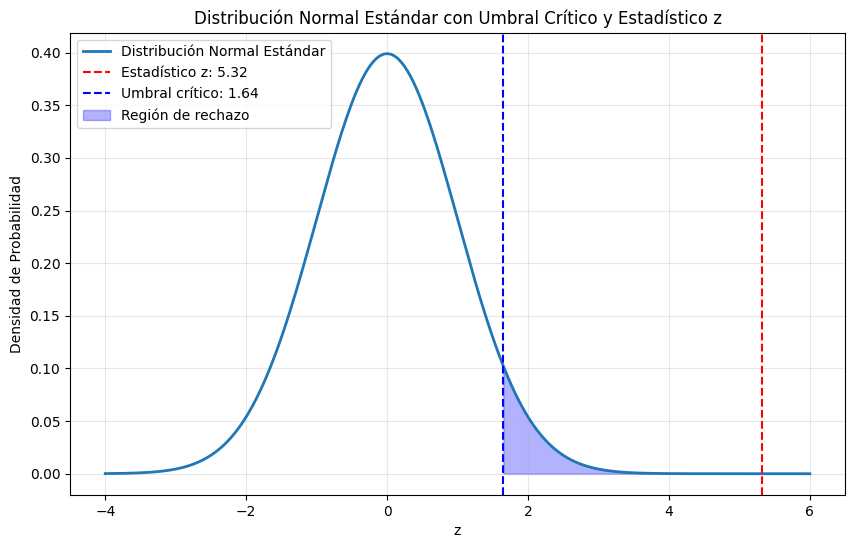

Resultados del Z-Test Unilateral:
Media de las diferencias (mean_diff): 5.353
Desviación estándar (std_diff): 10.063
Estadístico z: 5.320
P-valor: 5.199e-08
Umbral crítico (z_critical): 1.645


In [ ]:
# Cargar el CSV
file_path_large = "paired_test_ecommerce_large.csv"

# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


data = pd.read_csv(file_path_large)

# Calcular las diferencias
differences = data["Time_After"] - data["Time_Before"]

# Calcular media y desviación estándar de las diferencias
mean_diff = differences.mean()
std_diff = differences.std()

# Tamaño de la muestra
n = len(differences)

# Hipótesis nula
mu_0 = 0

# Estadístico z
z = (mean_diff - mu_0) / (std_diff / np.sqrt(n))

# p-valor unilateral (mayor a)
p_value = 1 - norm.cdf(z)

# Valor crítico para un test unilateral con alpha = 0.05
alpha = 0.05
z_critical = norm.ppf(1 - alpha)

# Visualización de la distribución normal estándar
x = np.linspace(-4, 6, 500)
y = norm.pdf(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Distribución Normal Estándar", lw=2)

# Línea del estadístico z
plt.axvline(z, color="red", linestyle="--", label=f"Estadístico z: {z:.2f}")

# Línea del umbral crítico
plt.axvline(z_critical, color="blue", linestyle="--", label=f"Umbral crítico: {z_critical:.2f}")

# Rellenar la región de rechazo
plt.fill_between(x, y, where=(x >= z_critical), color="blue", alpha=0.3, label="Región de rechazo")

# Etiquetas y leyenda
plt.title("Distribución Normal Estándar con Umbral Crítico y Estadístico z")
plt.xlabel("z")
plt.ylabel("Densidad de Probabilidad")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Resultados
print("Resultados del Z-Test Unilateral:")
print(f"Media de las diferencias (mean_diff): {mean_diff:.3f}")
print(f"Desviación estándar (std_diff): {std_diff:.3f}")
print(f"Estadístico z: {z:.3f}")
print(f"P-valor: {p_value:.3e}")
print(f"Umbral crítico (z_critical): {z_critical:.3f}")
